In [10]:
## imports
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time


## imports
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn  
import torch.optim as optim
from scipy.interpolate import BarycentricInterpolator
import scipy
import seaborn as sns
from sklearn.model_selection import ParameterGrid
from torch.optim.lr_scheduler import StepLR
from torch.optim.lr_scheduler import ExponentialLR
from torch.utils.data import DataLoader, TensorDataset
import time
import json
import os


In [64]:
# Enable autoreload
%load_ext autoreload
%autoreload 2

# Now import your modules
from my_classes.NeuralCopula import *
from my_classes.AnalyticalCopulas import *
from my_classes.Utilities import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Big test of copula performance

##############################################
Portfolio: Gaussian_0
##############################################
----------------------------------------------
Fitting Gaussian Copula model...
Estimated correlation coefficient:-0.0059
----------------------------------------
Fitting Students Copula model...
Optimizing degrees of freedom...
Estimated DF:  92.96988594171762  Estimated correlation coefficient:  -0.005937849395883373
----------------------------------------
Fitting Clayton Copula model...
Optimizing theta...
Optimization result:  True
Optimization failed, trying again...
Message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
Optimizing theta...
Optimization failed, trying again...
Message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
Optimizing theta...
Optimization failed, trying again...
Message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
Optimizing theta...
Optimization failed, trying again...
Message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
Opt

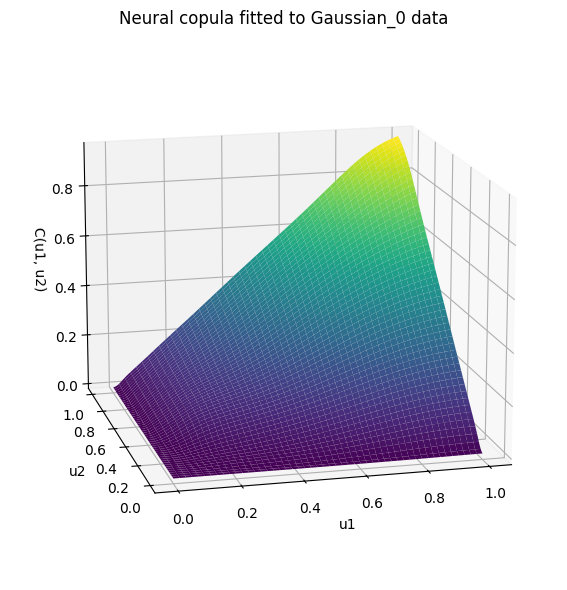

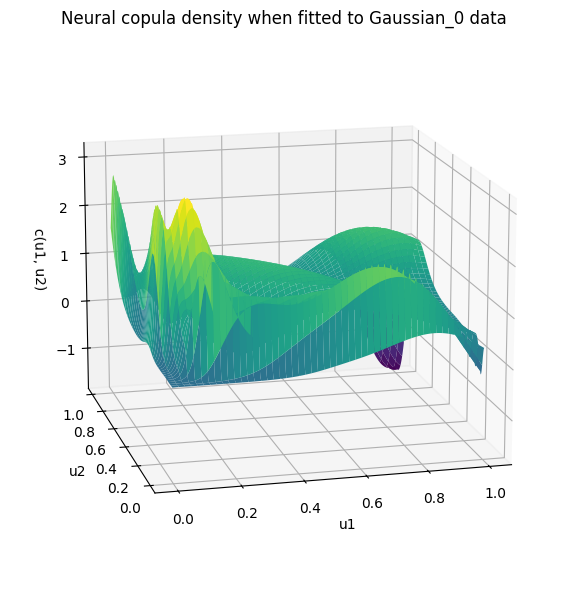

----------------------------------------
##############################################
Portfolio: Gaussian_0.7
##############################################
----------------------------------------------
Fitting Gaussian Copula model...
Estimated correlation coefficient:0.7143
----------------------------------------
Fitting Students Copula model...
Optimizing degrees of freedom...
Estimated DF:  3499.84442974769  Estimated correlation coefficient:  0.7142959883493478
----------------------------------------
Fitting Clayton Copula model...
Optimizing theta...
Optimization result:  True
Optimization failed, trying again...
Message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
Optimizing theta...
Optimization failed, trying again...
Message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
Optimizing theta...
Optimization failed, trying again...
Message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
Optimizing theta...
Optimization failed, trying again...
Message: CONVER

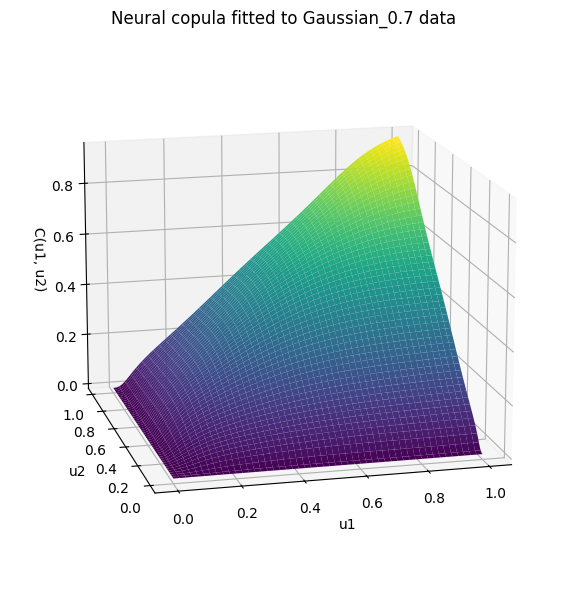

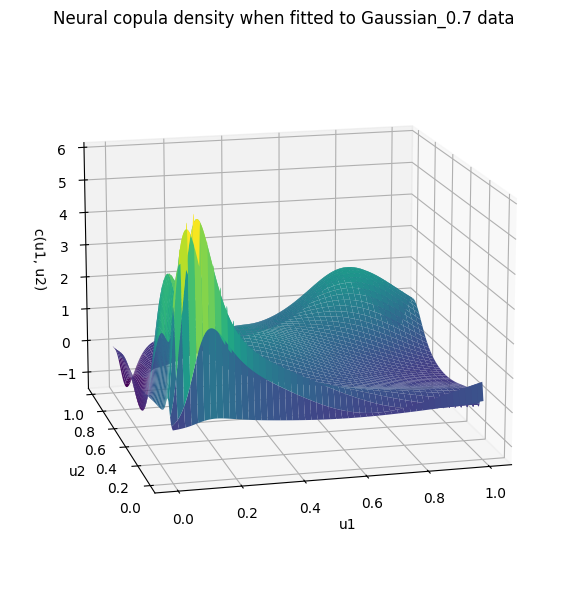

----------------------------------------
##############################################
Portfolio: Students_-0.8_3
##############################################
----------------------------------------------
Fitting Gaussian Copula model...
Estimated correlation coefficient:-0.7846
----------------------------------------
Fitting Students Copula model...
Optimizing degrees of freedom...
Estimated DF:  2.6650004878087117  Estimated correlation coefficient:  -0.7846068530153999
----------------------------------------
Fitting Clayton Copula model...
Optimizing theta...
Optimization result:  True
Optimization failed, trying again...
Message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
Optimizing theta...
Optimization failed, trying again...
Message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
Optimizing theta...
Optimization failed, trying again...
Message: ABNORMAL: 
Optimizing theta...
Optimization failed, trying again...
Message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PG

c:\Users\JohanHerbert\Documents\Thesisfolder\Python\ThesisWork\my_classes\AnalyticalCopulas.py:212: RuntimeWarning: overflow encountered in power
  pdf_values = (u1**(-theta) + u2**(-theta) - 1)**(-2 - 1/theta) * u1**(-theta - 1) * u2**(-theta - 1)*(theta + 1)
c:\Users\JohanHerbert\Documents\Thesisfolder\Python\ThesisWork\my_classes\AnalyticalCopulas.py:212: RuntimeWarning: invalid value encountered in multiply
  pdf_values = (u1**(-theta) + u2**(-theta) - 1)**(-2 - 1/theta) * u1**(-theta - 1) * u2**(-theta - 1)*(theta + 1)
c:\Users\JohanHerbert\Documents\Thesisfolder\Python\ThesisWork\my_classes\AnalyticalCopulas.py:207: RuntimeWarning: divide by zero encountered in log
  loglikelihood = np.sum(np.log(likelihoodvals))


Optimization failed, trying again...
Message: ABNORMAL: 
Optimizing theta...
Optimization failed, trying again...
Message: ABNORMAL: 
Optimizing theta...
Optimization failed, trying again...
Message: ABNORMAL: 
Optimizing theta...
Optimization failed, trying again...
Message: ABNORMAL: 
Optimizing theta...
Optimization failed, trying again...
Message: ABNORMAL: 
Optimizing theta...
Optimization failed, trying again...
Message: ABNORMAL: 
Optimizing theta...
Optimization failed, trying again...
Message: ABNORMAL: 
Optimizing theta...
Optimization failed, trying again...
Message: ABNORMAL: 
Optimizing theta...
Optimization failed, trying again...
Message: ABNORMAL: 
Optimizing theta...
Optimization failed, trying again...
Message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
Optimizing theta...
Optimization failed, trying again...
Message: ABNORMAL: 
Optimizing theta...
Optimization failed, trying again...
Message: ABNORMAL: 
Optimizing theta...
Optimization failed, trying again...
M

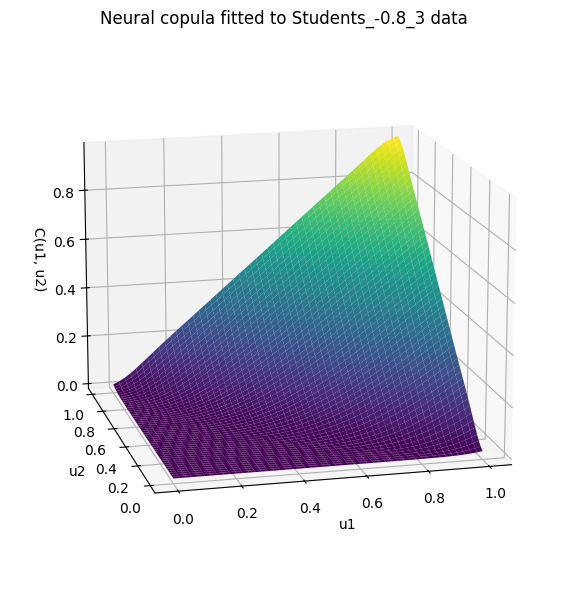

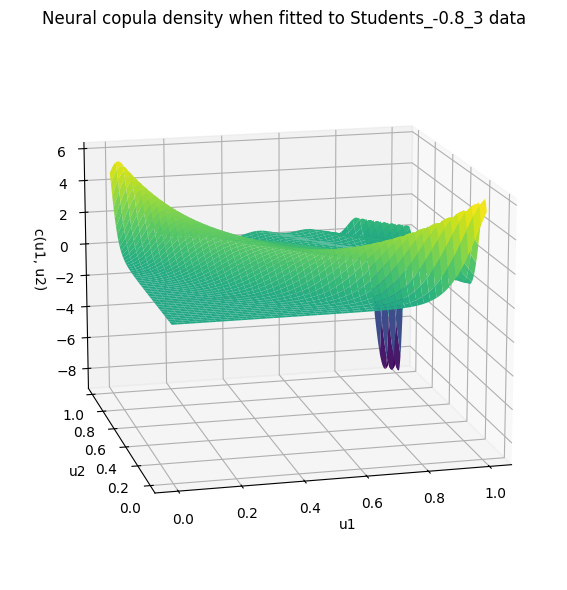

----------------------------------------
##############################################
Portfolio: Clayton_4
##############################################
----------------------------------------------
Fitting Gaussian Copula model...
Estimated correlation coefficient:0.8364
----------------------------------------
Fitting Students Copula model...
Optimizing degrees of freedom...
Estimated DF:  3.408906398549691  Estimated correlation coefficient:  0.8363624210702943
----------------------------------------
Fitting Clayton Copula model...
Optimizing theta...
Optimization result:  True
Optimization failed, trying again...
Message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
Optimizing theta...
Optimization failed, trying again...
Message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
Optimizing theta...
Optimization failed, trying again...
Message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
Optimizing theta...
Optimization failed, trying again...
Message: CONV

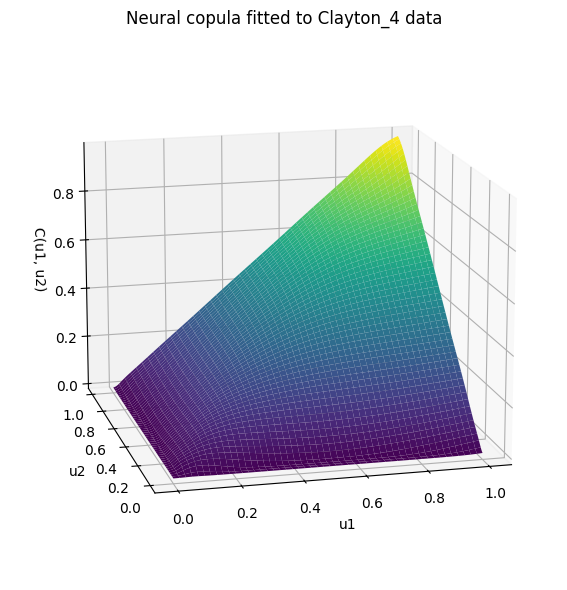

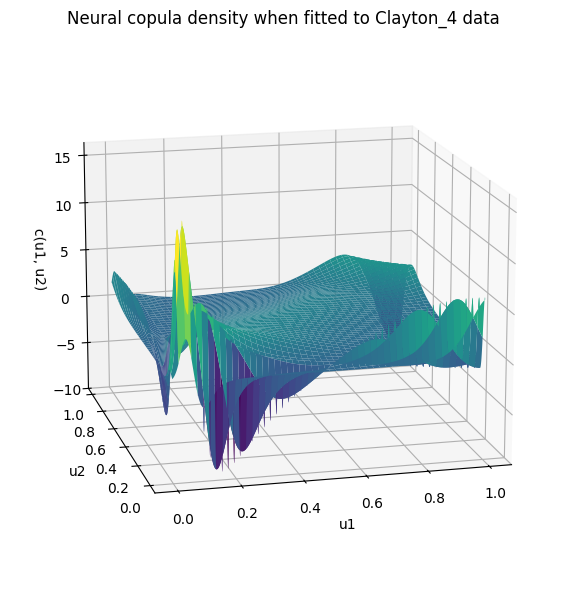

----------------------------------------


In [65]:
np.random.seed(0)
torch.manual_seed(1)
## Initiate datasets 
copulaSpecDict = {'Gaussian_0': {'Copula': GaussianCopula(), 'correlation': 0.0},
       'Gaussian_0.7': {'Copula': GaussianCopula(), 'correlation': 0.7},
       'Students_-0.8_3': {'Copula': StudentsCopula(), 'correlation': -0.8, 'df': 3},
       'Clayton_4': {'Copula': ClaytonCopula(), 'theta': 4},
       }

## Initiate datasets to be used for the copula fitting
copulaList = [ GaussianCopula(), StudentsCopula(), ClaytonCopula(), NeuralCopula()]#,   

CodeRun = CodeRunner(copulaSpecDict, copulaList, n = 10000, proportion = 0.5)
CodeRun.createPortfolios()
CodeRun.fitCopulas()



----------------------------------------------
Portfolio: Gaussian_0
----------------------------------------------
Distance for Gaussian Copula is: 0.0003668133164996684
Distance for Students Copula is: 0.0038522195020258207
Distance for Clayton Copula is: 0.0002542075579318659
Distance for Neural Copula is: 0.002080553683369693


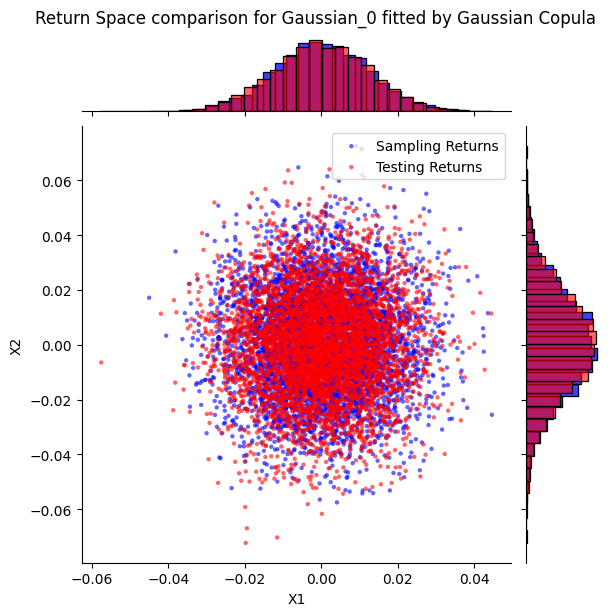

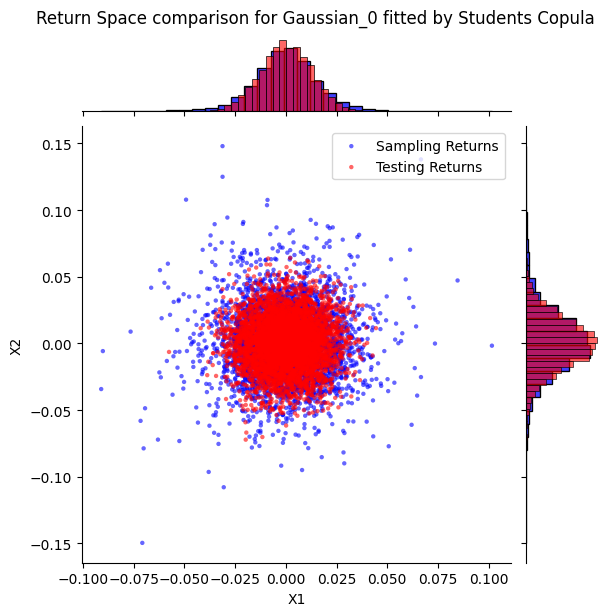

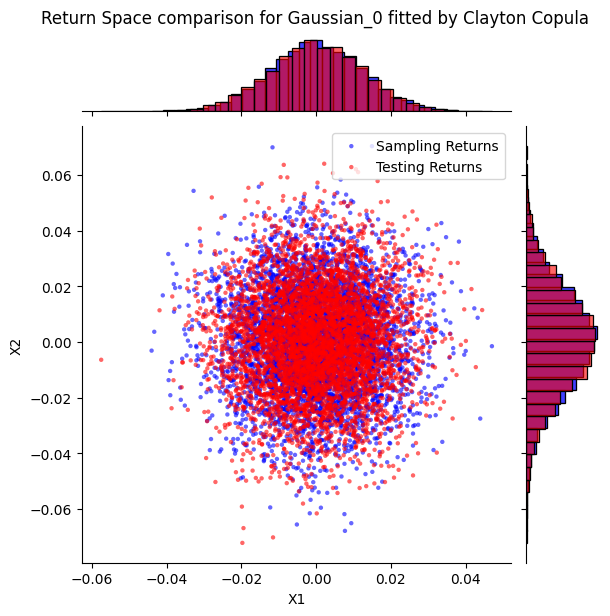

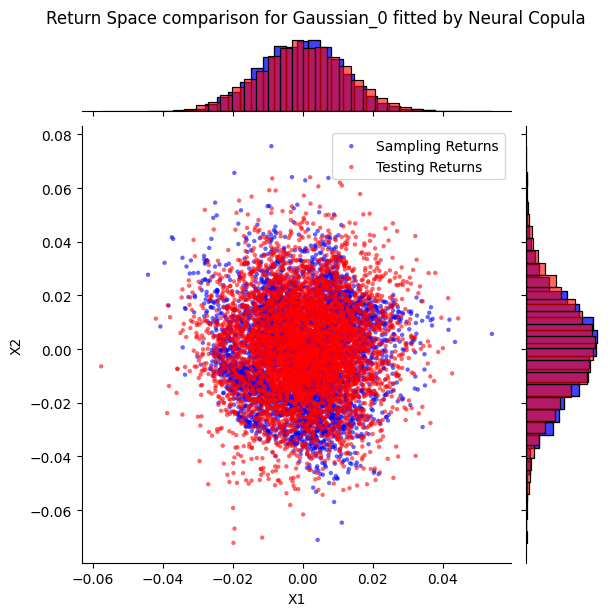

----------------------------------------------
Portfolio: Gaussian_0.7
----------------------------------------------
Distance for Gaussian Copula is: 0.0005717991985057806
Distance for Students Copula is: 0.0033996823520009126
Distance for Clayton Copula is: 0.0010310700286093326
Distance for Neural Copula is: 0.0026757750267181455


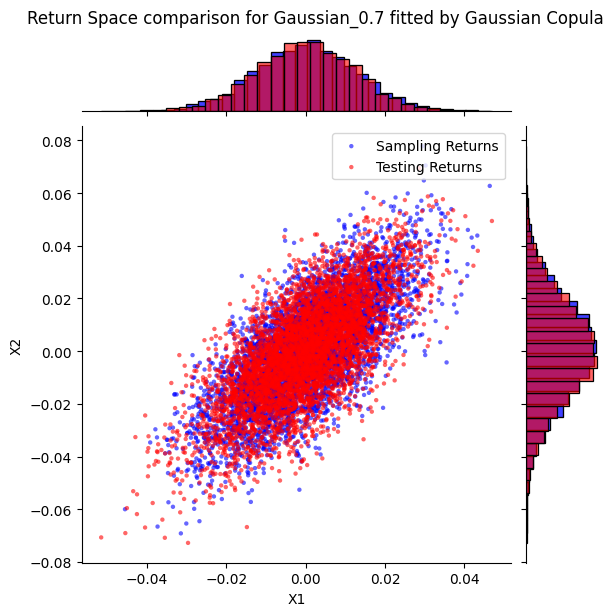

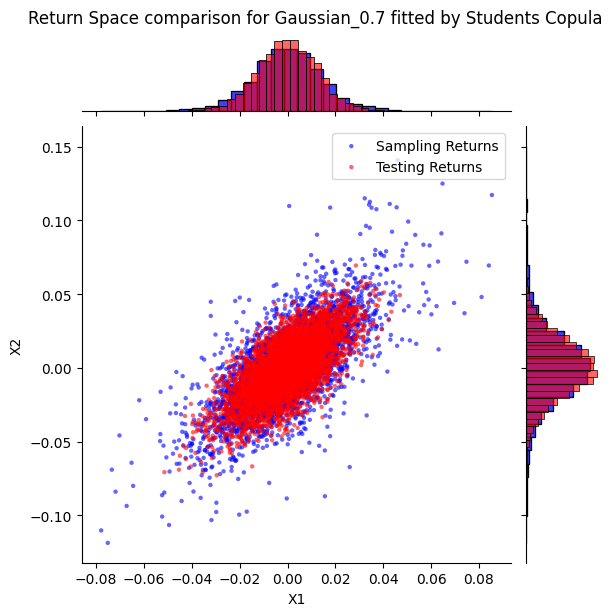

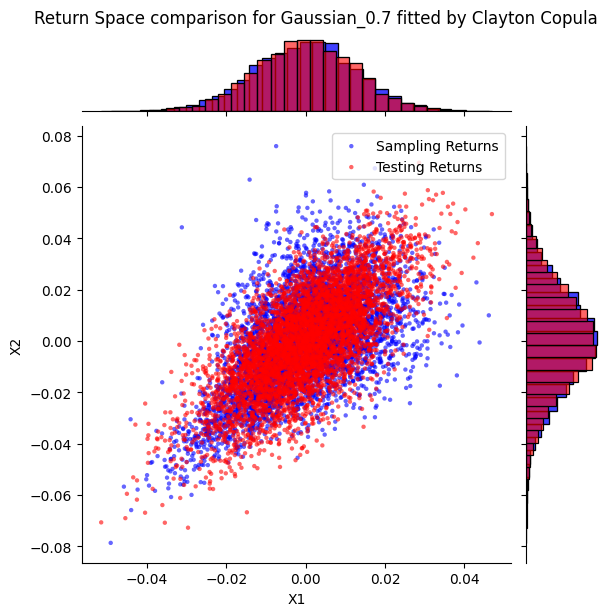

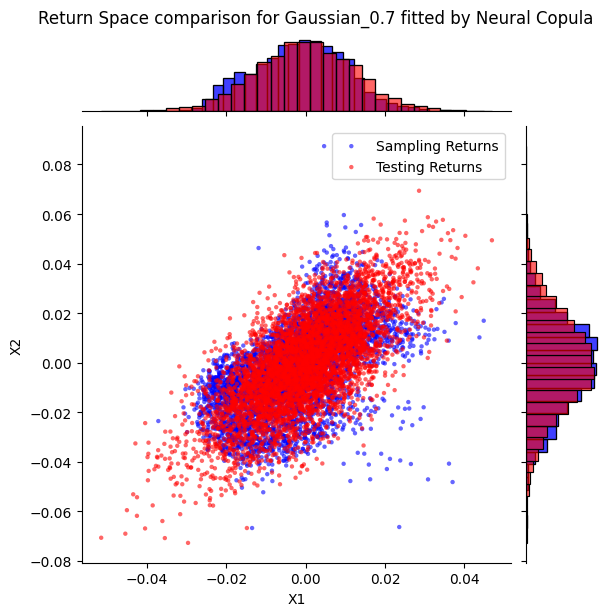

----------------------------------------------
Portfolio: Students_-0.8_3
----------------------------------------------
Distance for Gaussian Copula is: 0.0005841467002399974
Distance for Students Copula is: 0.0013670077978858847
Distance for Clayton Copula is: 0.004149748583783394
Distance for Neural Copula is: 0.0008992083635621424


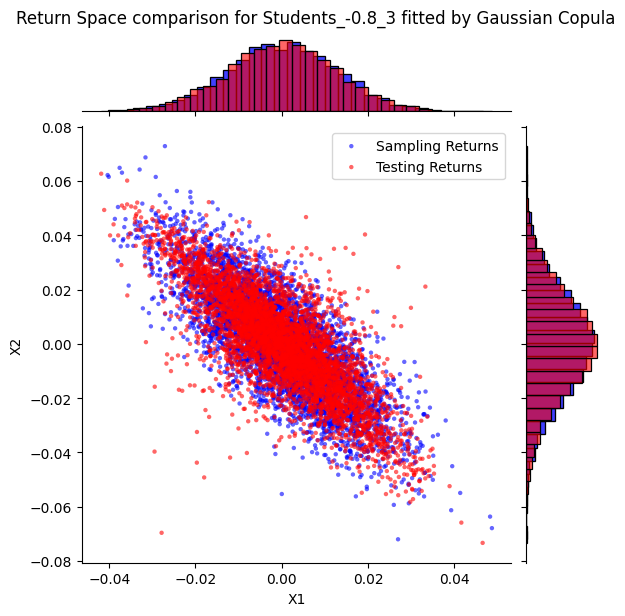

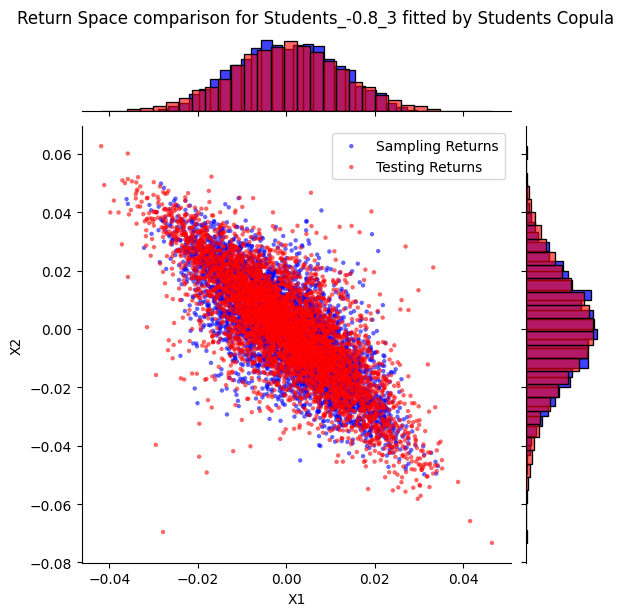

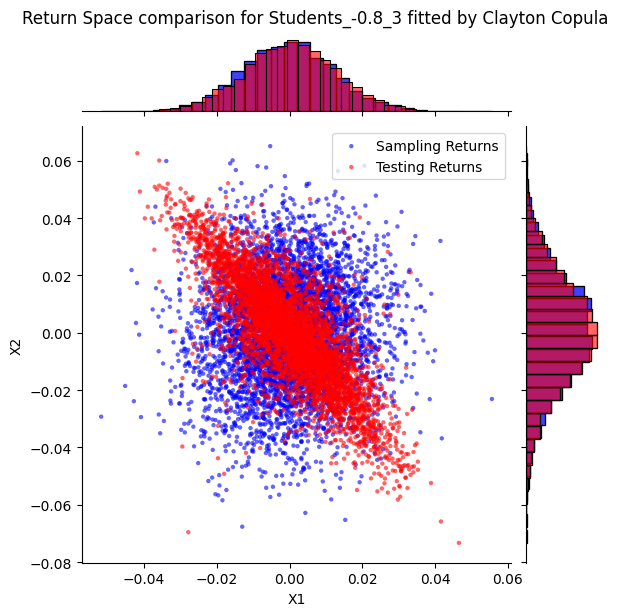

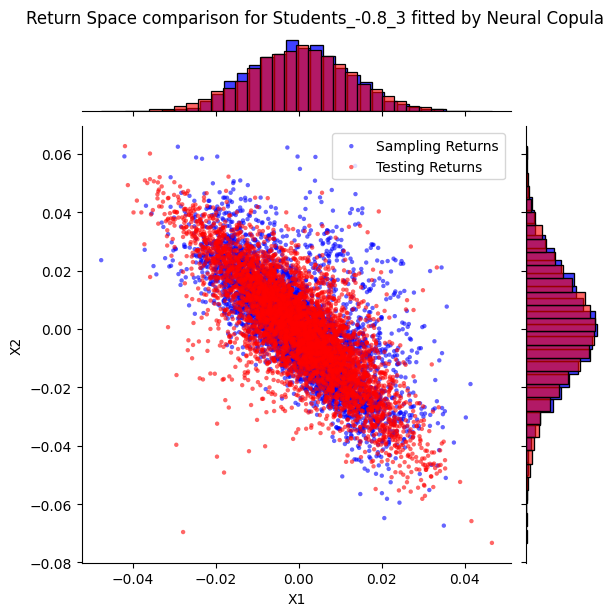

----------------------------------------------
Portfolio: Clayton_4
----------------------------------------------
Distance for Gaussian Copula is: 0.0012349834135433647
Distance for Students Copula is: 0.0011821396653573396
Distance for Clayton Copula is: 0.0012467537803803536
Distance for Neural Copula is: 0.002608045248953561


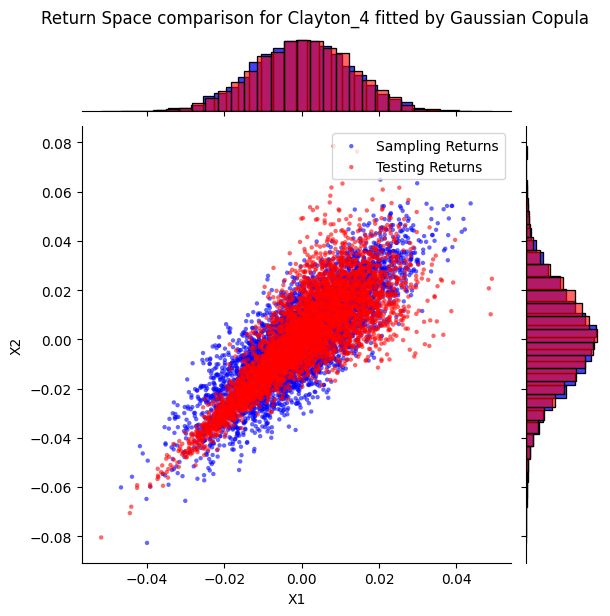

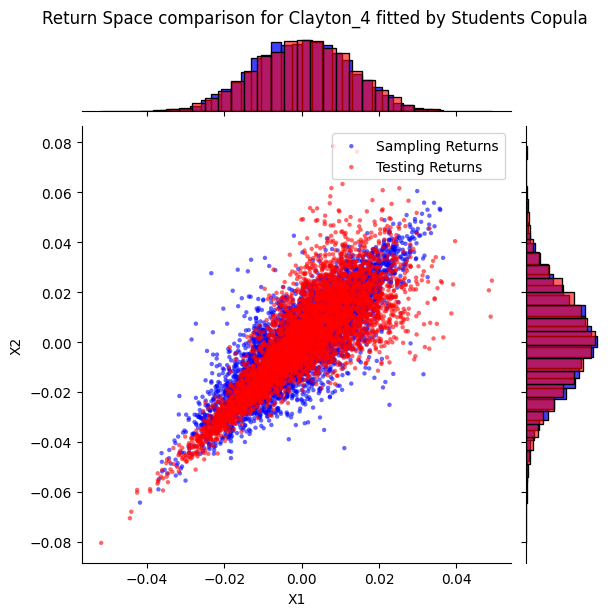

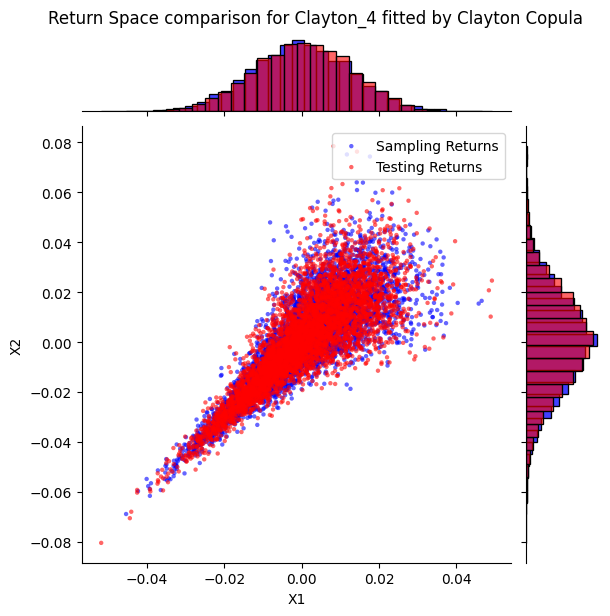

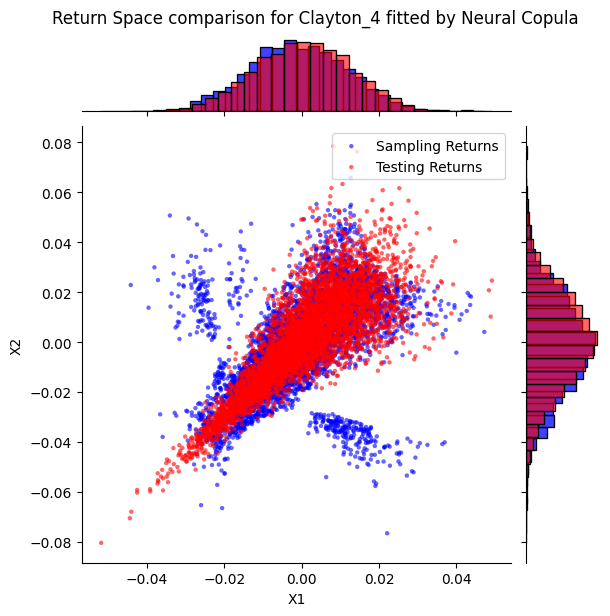

In [66]:
CodeRun.displayResults()

# Portfolio Plots

Portfolio: Gaussian_0


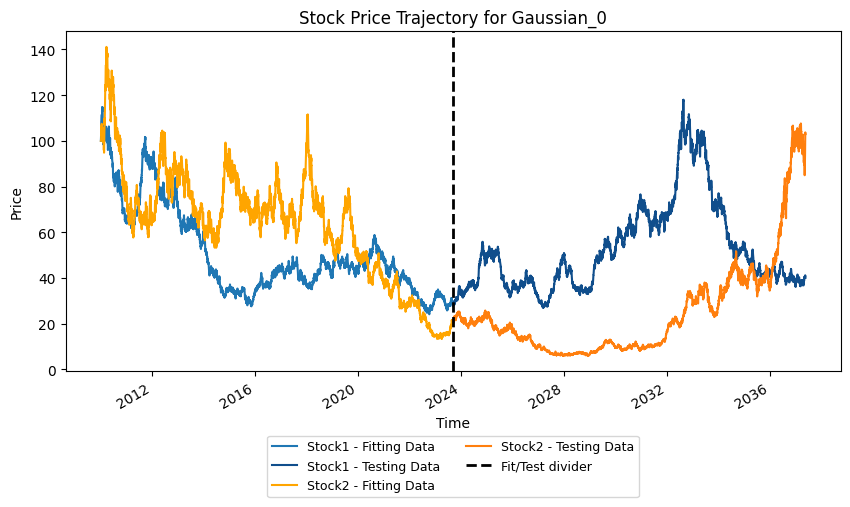

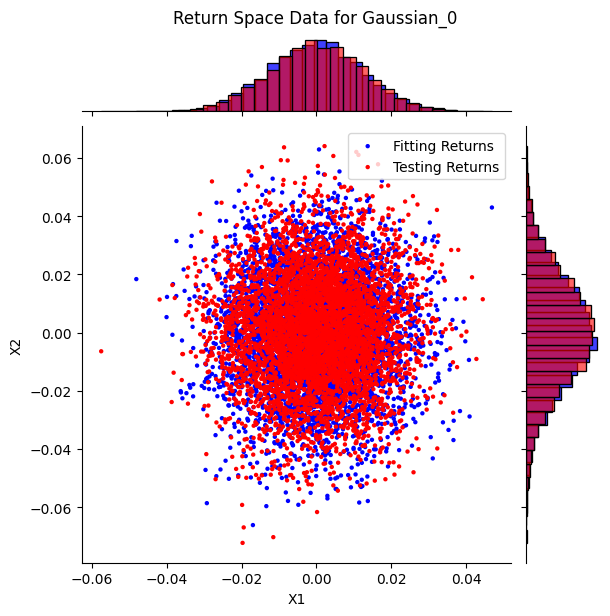

Portfolio: Gaussian_0.7


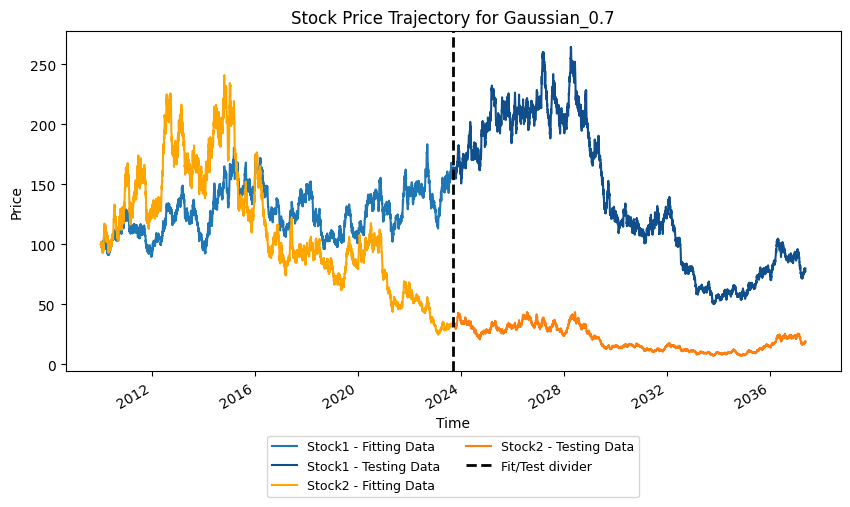

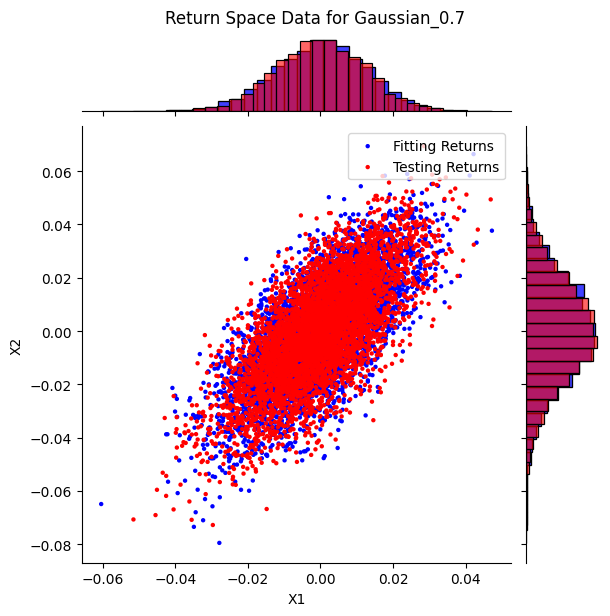

Portfolio: Students_-0.8_3


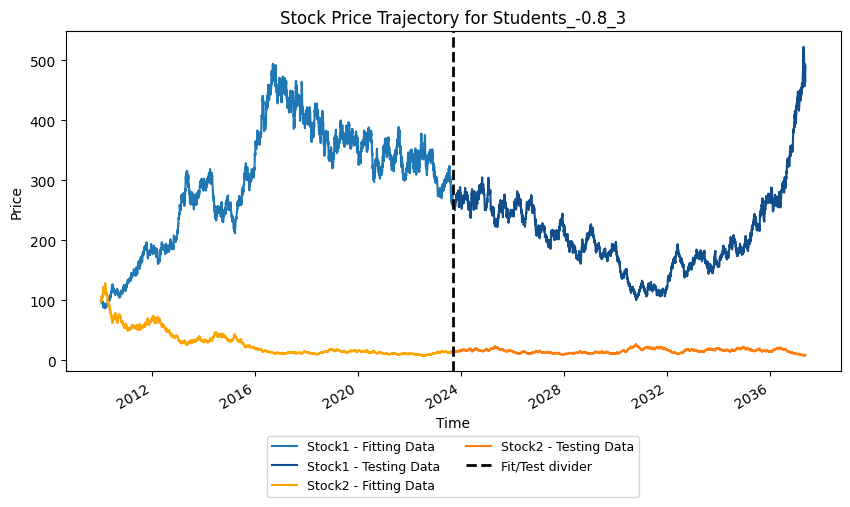

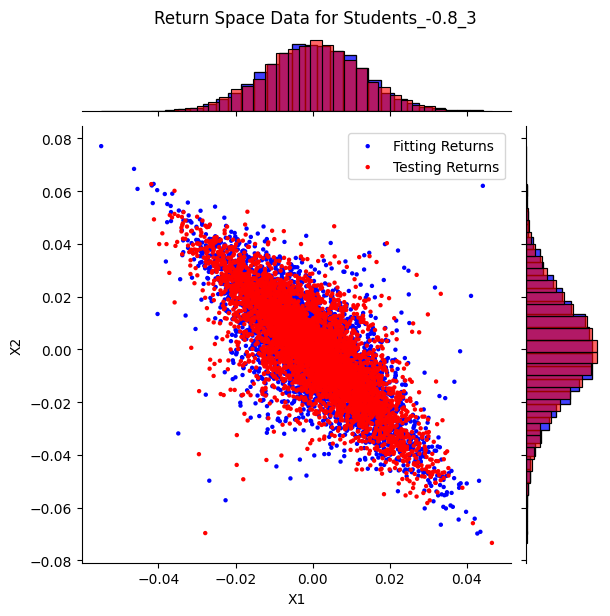

Portfolio: Clayton_4


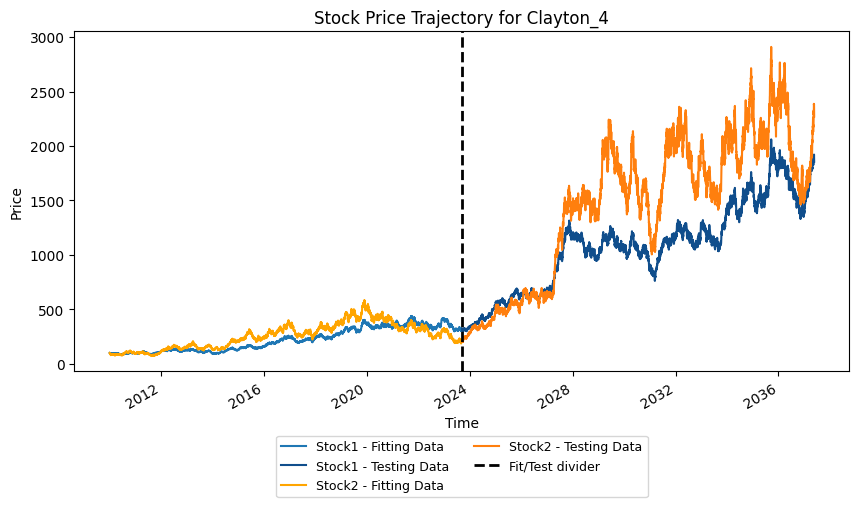

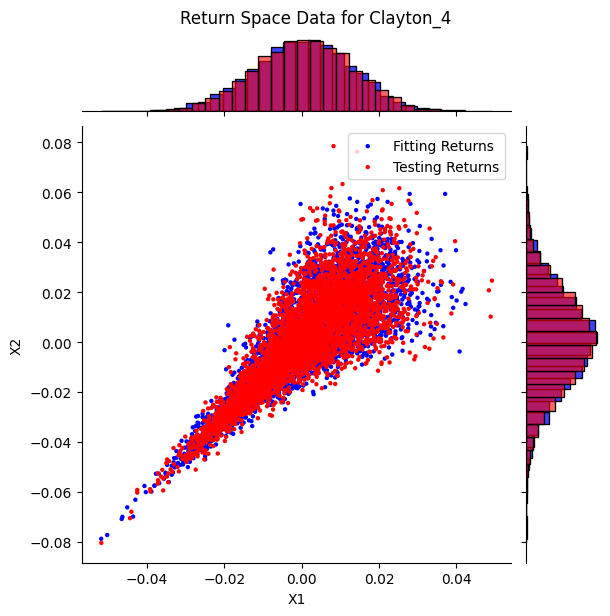

In [5]:
CopulaPlot = plotCopulaData()
portfolioKeys = list(CodeRun.Portfolios.keys())

for key in portfolioKeys:
    print('Portfolio:', key)
    Portfolio = CodeRun.Portfolios[key]
    CopulaPlot.plotStockPriceSections(Portfolio.FittingDF, Portfolio.TestingDF, key = key)
    CopulaPlot.plotFittingTestComparison(Portfolio.FittingReturns, Portfolio.TestingReturns, title=key)
    

